<a href="https://colab.research.google.com/github/RyutoIzuka/Machine-Learning/blob/main/Unit_2_Assignment__KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#lib
import sklearn 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier 


from sklearn import datasets
from sklearn.preprocessing import StandardScaler  #--> learn StandardScaler: 

In [2]:
from google.colab import files 
upload = files.upload()

Saving IRIS.csv to IRIS.csv


In [3]:
#dataset 
iris = pd.read_csv('IRIS.csv')
iris.head(5)



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [5]:
iris.shape

(150, 5)

In [6]:
xVar = ['sepal_length', 'petal_length', 'petal_length', 'petal_width']
yVar = ['species']

#reshape 
x = np.array(iris[xVar]).reshape(-1,4)
y = np.array(iris[yVar]).reshape(-1,1) #first value is -1, next value is the length of x variable
print(x.shape)
print(y.shape)

(150, 4)
(150, 1)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1) #80% for training and 20% for testing #random_state = the testing and training data won't change all the time 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(120, 4)
(30, 4)
(120, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

The optimal K-value is 15


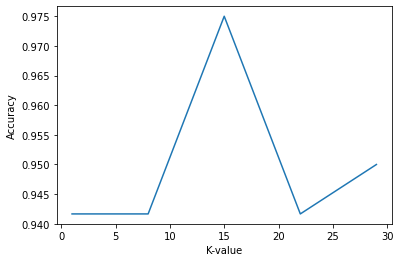

In [23]:
#first method of finding optimal k_value
kValue = [i for i in range(1,30,7)] #1-49 and only odd numbers
kAccScores = []

for k in kValue:   
  knnModel = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  cvScores = cross_val_score(knnModel, x_train, y_train, cv=5, scoring='accuracy')
  kAccScores.append(cvScores.mean())

optimalK = kValue[kAccScores.index(max(kAccScores))]
print("The optimal K-value is {}".format(optimalK)) 

plt.plot(kValue,kAccScores)
plt.xlabel("K-value")
plt.ylabel("Accuracy")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

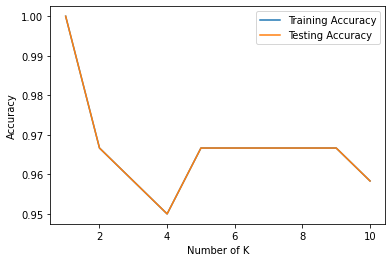

In [9]:
#second method to find optimal k_value
trainingAcc = []
testingAcc = []

neighbor = range(1,11)

for numberOfN in neighbor:
  knn = KNeighborsClassifier(n_neighbors=numberOfN)
  knn.fit(x_train,y_train)
  trainingAcc.append(knn.score(x_train,y_train))
  testingAcc.append(knn.score(x_train,y_train))

plt.plot(neighbor,trainingAcc, label="Training Accuracy")
plt.plot(neighbor,testingAcc, label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of K")
plt.legend()

In [10]:
#model building 
knnModel = KNeighborsClassifier(n_neighbors=15, n_jobs=-1).fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [11]:
#predict using the whole dataset
y_predict = knnModel.predict(x_test)
y_predict = y_predict.reshape(-1)
print(y_predict)

#come up with data frame table of predict and actual --> Task 

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [12]:
y_test = y_test.reshape(-1)
print(y_test)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [13]:
#create the dataframe or table
table = pd.DataFrame({"Predicted Values" : y_predict, "Actual Values": y_test})
print(table)

   Predicted Values    Actual Values
0       Iris-setosa      Iris-setosa
1   Iris-versicolor  Iris-versicolor
2   Iris-versicolor  Iris-versicolor
3       Iris-setosa      Iris-setosa
4    Iris-virginica   Iris-virginica
5   Iris-versicolor  Iris-versicolor
6    Iris-virginica   Iris-virginica
7       Iris-setosa      Iris-setosa
8       Iris-setosa      Iris-setosa
9    Iris-virginica   Iris-virginica
10  Iris-versicolor  Iris-versicolor
11      Iris-setosa      Iris-setosa
12   Iris-virginica   Iris-virginica
13  Iris-versicolor  Iris-versicolor
14  Iris-versicolor  Iris-versicolor
15      Iris-setosa      Iris-setosa
16  Iris-versicolor  Iris-versicolor
17  Iris-versicolor  Iris-versicolor
18      Iris-setosa      Iris-setosa
19      Iris-setosa      Iris-setosa
20  Iris-versicolor  Iris-versicolor
21  Iris-versicolor  Iris-versicolor
22   Iris-virginica  Iris-versicolor
23      Iris-setosa      Iris-setosa
24   Iris-virginica   Iris-virginica
25  Iris-versicolor  Iris-versicolor
2

In [14]:
knnModel.predict_proba(x_test)

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.06666667, 0.93333333],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.86666667, 0.13333333],
       [0.        , 0.86666667, 0.13333333],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.86666667, 0.13333333],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.8       , 0.2       ],
       [0.

In [22]:
input = np.array([5.7, 2.5, 5.0, 2.0])
input = input.reshape(-1,4)


In [16]:
y_predict1 = knnModel.predict(input)
print(y_predict1)

['Iris-versicolor']


In [17]:
knnModel.predict_proba(input)

array([[0., 1., 0.]])

In [18]:
#find the accuracy 
from sklearn.metrics import accuracy_score
accuracyResult = accuracy_score(y_test, y_predict)
print(accuracyResult)


0.9666666666666667


Accuracy is one of the measures used to evaluate classification models. Informally, accuracy is the percentage of predictions made correctly by our model.

Accuracy = number of correct predictions / total number of predictions

In the case of binary classification, accuracy can also be calculated in positive and negative terms as follows:

Accuracy = (TP + TN)/ (TP + TN + FP + FN)

Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.